In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
from scipy import fftpack

In [ ]:
from scipy import fftpack

#Introduction
Given a signal: $$s(t)=\dfrac{1}{1-0.9\sin t}$$
We can add some noise:
$$n(t)= \alpha(2r_{i}-1),0\leq r_{i} \leq 1$$

Where $r_{i}$ is a generated using a random number generator and $\alpha$ is an adjustable parameter.

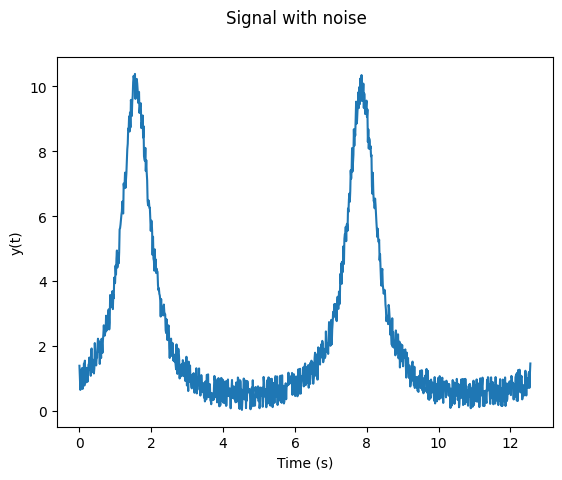

In [ ]:
import random
def s(t):
  return 1 / (1 - 0.9 * np.sin(t))

def y(t,alpha):
  noise = []
  for i in t:
    noise.append(s(i) + alpha * (2 * random.uniform(0,1) - 1))


  return  noise


alpha = 0.5
omega=0.5
T=2.*np.pi/omega
dt=T*.001
t=np.arange(0.,T,dt)

#Plotting the signal
plt.plot(t,y(t,alpha))
plt.suptitle("Signal with noise")
plt.xlabel("Time (s)")
plt.ylabel("y(t)")
plt.show()


Y = fftpack.fft(y(t,alpha))
#k=np.arange(0,len(Y))
#plt.scatter(k, Y)
#plt.suptitle("Y vs K")
#plt.show()



By using the Discrete Fourier Transform or ScyPy's vuilt in FFT we can easily find the fourier transform represented as a power spectrum. The power spectrum lets us find the power of the $k_{th}$ frequency.  

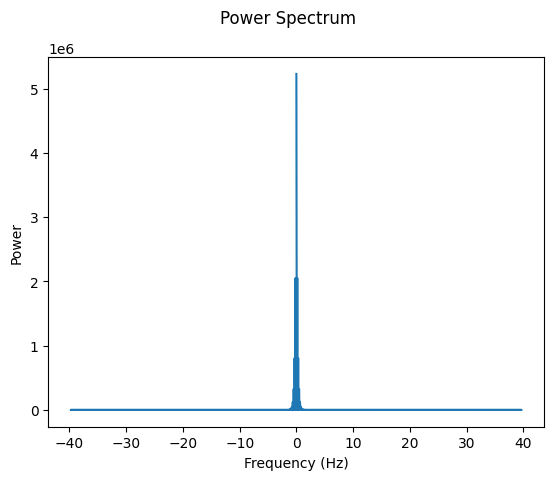

39.70915830142789

In [ ]:
Power_Spectrum = np.abs(Y)**2
freqs = fftpack.fftfreq(Y.size, dt)

plt.plot(freqs, Power_Spectrum)
plt.suptitle("Power Spectrum")
plt.ylabel("Power")
plt.xlabel("Frequency (Hz)")
plt.show()
max(freqs)

#Autocorrelation Function
The Autocorrelation Function lets us take this signal with noise and filter out the noise in the signal. We can now analyze this noiseless signal and find the frequencies of the signal.

The autocorrelation function is defined as: $$A(\tau)=\int_{-\infty}^{\infty} y(t)y^{2}(t-\tau)dt $$



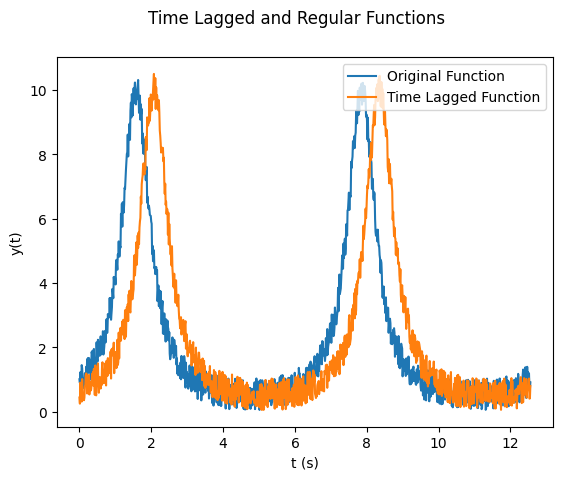

In [ ]:
def y_lag(t,alpha,lag):
  noise = []
  for i in t:
    noise.append(s(i-lag) + alpha * (2 * random.uniform(0,1) - 1))
  return noise

f1 = y(t,alpha)
f2 = y_lag(t,alpha,0.5,)
plt.plot(t,f1, label = "Original Function")
plt.plot(t,f2, label = "Time Lagged Function")
plt.xlabel("t (s)")
plt.ylabel("y(t)")
plt.suptitle("Time Lagged and Regular Functions")
plt.legend()
plt.show()

Since noise is random it gets averaged out of the autocorrelation function. This leaves us with an approximation of the autocorrelation function of the pure signal.
$$A(\omega)=\sqrt{2\pi}|S(\omega)|^{2}$$

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


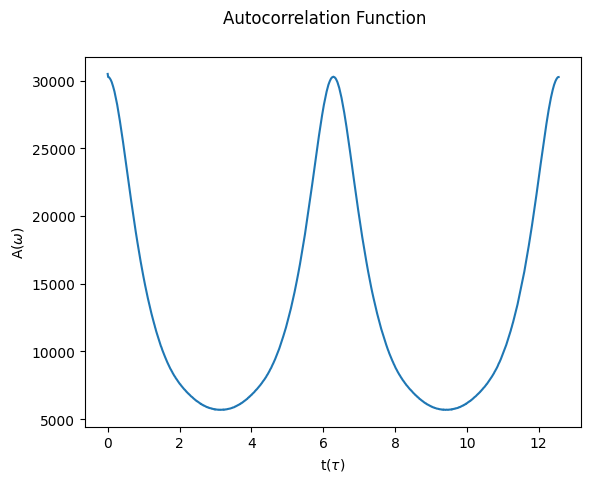

In [ ]:
A_omega = np.sqrt(2*np.pi)*np.abs(fftpack.fft(y(t,alpha)))**2
plt.plot(t, fftpack.ifft(A_omega))
plt.suptitle("Autocorrelation Function")
plt.ylabel(r"A($\omega$)")
plt.xlabel(r"t($\tau$)")
plt.show()

Looks a lot better! Now exploring more what about $\alpha$? For what values of $\alpha$ do we loose all information in the input?

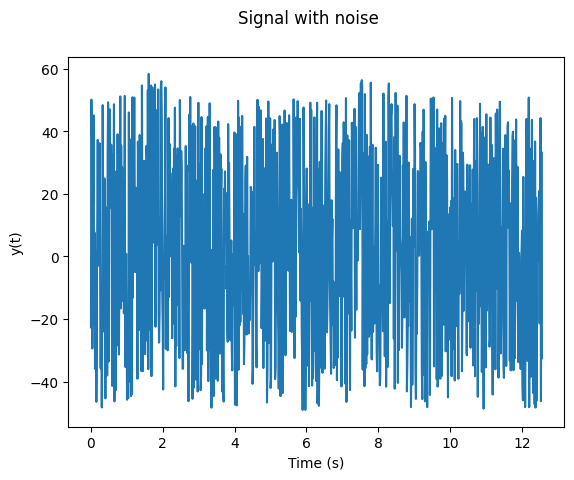

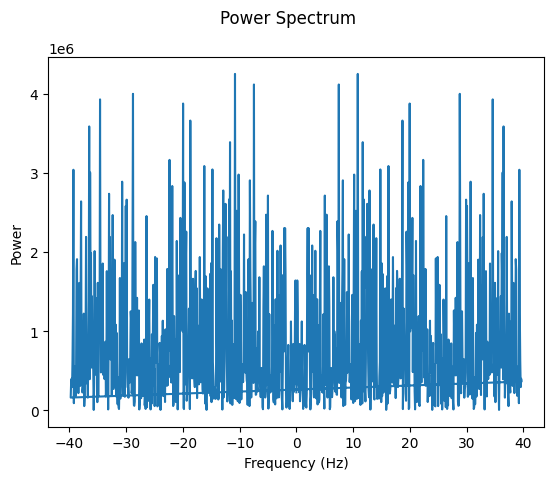

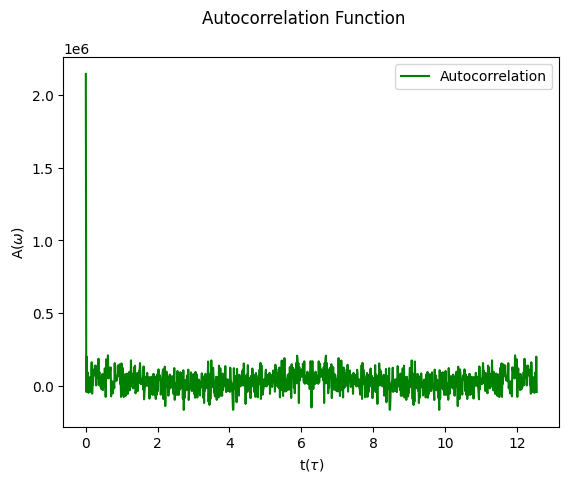

In [ ]:
alpha1 = 50

plt.plot(t,y(t,alpha1))
plt.suptitle("Signal with noise")
plt.xlabel("Time (s)")
plt.ylabel("y(t)")
plt.show()
Y2 = fftpack.fft(y(t,alpha1))


#Power Spectrum
Power_Spectrum = np.abs(Y2)**2
freqs = fftpack.fftfreq(Y2.size, dt)
plt.plot(freqs, Power_Spectrum)
plt.suptitle("Power Spectrum")
plt.ylabel("Power")
plt.xlabel("Frequency (Hz)")
plt.show()


A_omega2 = np.sqrt(2*np.pi)*np.abs(fftpack.fft(y(t,alpha1)))**2
plt.plot(t, fftpack.ifft(A_omega2), label = "Autocorrelation", color = "green")
#plt.plot(t,y(t,alpha1), label = "Orignal Signal")
plt.suptitle("Autocorrelation Function")
plt.ylabel(r"A($\omega$)")
plt.xlabel(r"t($\tau$)")
plt.legend()
plt.show()

 For large values of $\alpha$ we loose informations in the input causing the signal to go wild and difficult to analyze.

#Filters
##Windowed Sinc Filters
The Windowed Sinc Filter is a low pass filter that cuts off frequencies above a selected frequency $\omega_{c}$ because there tends to be more noise at higher frequencies than lower frequencies. The filter can be written as:
$$H(\omega,\omega_{c})=rect( \frac{\omega}{2\omega_{c}} )$$

We can rewrite $rect(\omega)$ as a fourier transform to get a function for the sinc function.
$$\int_{-\infty}^{\infty} e^{-i\omega t}rect(\omega) dw=sinc(\frac{t}{2})=\frac{\sin(\frac{\pi t}{2})}{\frac{\pi t}{2}} $$

In the time domain the representation of the sinc filter is:
$$h[i]=\frac{\sin(\omega_{c} i)}{i \pi}$$

To make the filter even more percise we sample at (M + 1) points and multiply by the Hamming window function. The filter becomes:
$$h[i]=\frac{\sin(2\pi \omega_{c}(i - \frac{M}{2}))}{i-\frac{M}{2}}[0.54-0.46\cos(\frac{2\pi i}{M})]$$

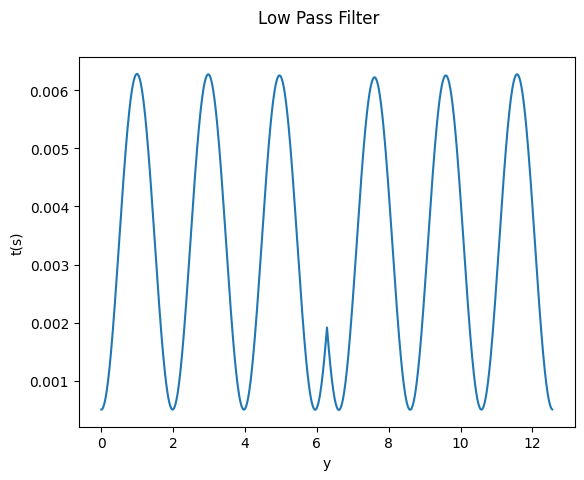

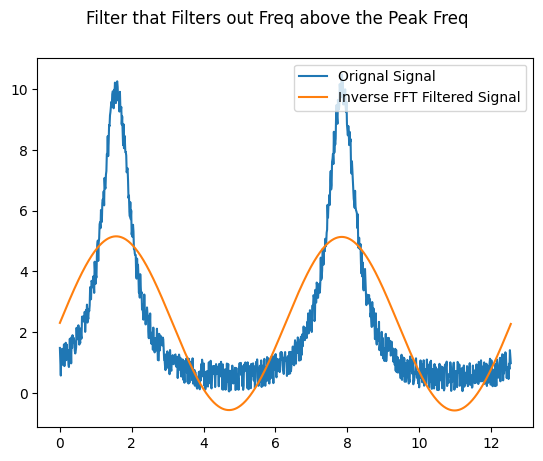

In [ ]:
h = []
M = T
w_c = 0.001
for i in fftpack.fftfreq(Y.size, dt):
  h.append(np.sin(2*np.pi*w_c*(i-M/2))/(i-M/2)*(0.54 - 0.46*np.cos(2*np.pi*i/M)))
plt.plot(t,h)
plt.ylabel("t(s)")
plt.xlabel("y")
plt.suptitle("Low Pass Filter")
plt.show()

#A cool filter I found while researching

Power_Spectrum = np.abs(Y)**2
freqs = fftpack.fftfreq(Y.size, dt)
pos_mask = np.where(freqs > 0) #Returns non-zero frequiences
freq = freqs[pos_mask]
peak_freq = freq[Power_Spectrum[pos_mask].argmax()]
high_freq_fft = Y.copy()
high_freq_fft[np.abs(freqs) > peak_freq] = 0 #Filtering frequiences that are above the peak to zero
filtered_sig = fftpack.ifft(high_freq_fft)
plt.plot(t,y(t,alpha), label = "Orignal Signal")
plt.plot(t,filtered_sig, label = "Inverse FFT Filtered Signal")
plt.suptitle("Filter that Filters out Freq above the Peak Freq")
plt.legend()
plt.show()